### Agenda

In [2]:
%load_ext memory_profiler

In [1]:
import dask.dataframe as dd
import pandas as pd
from tqdm.notebook import tqdm
import vaex

In [16]:
%%memit
csv_file = "OP_DTL_GNRL_PGYR2019_P06302020.csv"
chunk_size = 750000
for i, df in enumerate(vaex.from_csv(csv_file, chunk_size=chunk_size,low_memory=False)):
    df.export_hdf5('temp1.hdf5')
    if i == 0:
        break

peak memory: 3032.72 MiB, increment: 1679.27 MiB


In [15]:
%%memit
# csv_file = "OP_DTL_GNRL_PGYR2019_P06302020.csv"
csv_file = "medicare_all_1.csv"
chunk_size = 100000
#full_vaex_df = vaex.from_csv(csv_file,chunk_size=chunk_size,low_memory=False,convert=True)

peak memory: 1352.88 MiB, increment: 0.20 MiB


In [3]:
vaex_df = vaex.open('medicare_all_1.csv.hdf5')
vaex_df

#,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Physician_License_State_code2,Physician_License_State_code3,Physician_License_State_code4,Physician_License_State_code5,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Total_Amount_of_Payment_USDollars,Date_of_Payment,Number_of_Payments_Included_in_Total_Amount,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value,Charity_Indicator,Third_Party_Equals_Covered_Recipient_Indicator,Contextual_Information,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Covered_or_Noncovered_Indicator_2,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2,Product_Category_or_Therapeutic_Area_2,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2,Associated_Drug_or_Biological_NDC_2,Covered_or_Noncovered_Indicator_3,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3,Product_Category_or_Therapeutic_Area_3,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3,Associated_Drug_or_Biological_NDC_3,Covered_or_Noncovered_Indicator_4,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,nan,nan,None,299919.0,KEITH,A,VASENIUS,None,909 9TH AVE STE 202,None,FORT WORTH,TX,76104,United States,None,None,Medical Doctor,'Allopathic & Osteopathic Physicians|Internal Me...,TX,None,None,None,None,"Incisive Surgical, Inc.",100000041250,"Incisive Surgical, Inc.",MN,United States,10.77,06/27/2018,1,Cash or cash equivalent,Food and Beverage,None,None,None,No,No Third Party Payment,None,None,None,None,No,521110767,No,Yes,Covered,Device,INSORB Absorbable Stapler,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2018,06/30/2020
1,UNCHANGED,Covered Recipient Physician,nan,nan,None,154298.0,EDWARD,None,LOGUE,None,350 S GREENLEAF ST STE 405,None,GURNEE,IL,60031,United States,None,None,Medical Doctor,'Allopathic & Osteopathic Physicians|Orthopaedic...,IL,None,None,None,None,"Incisive Surgical, Inc.",100000041250,"Incisive Surgical, Inc.",MN,United States,15.26,01/08/2018,1,Cash or cash equivalent,Food and Beverage,None,None,None,No,No Third Party Payment,None,None,None,None,No,520978699,No,Yes,Covered,Device,INSORB Absorbable Stapler,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2018,06/30/2020
2,UNCHANGED,Covered Recipient Physician,nan,nan,None,122437.0,SENTHIL,K,THAMBIDORAI,None,909 9TH AVE STE 202,None,

In [19]:
%%time
vaex_df['Covered_Recipient_Type'].value_counts()

CPU times: user 1.6 s, sys: 2.05 ms, total: 1.6 s
Wall time: 852 ms


Covered Recipient Physician            21175208
Covered Recipient Teaching Hospital       89947
dtype: int64

In [20]:
vaex_df.shape

(21265155, 75)

In [7]:
vaex_df.groupby(by="Covered_Recipient_Type").agg({"Physician_First_Name": 'count'})

#,Covered_Recipient_Type,count
0,Covered Recipient Physician,2.11752e+07
1,Covered Recipient Teaching Hospital,89947


In [9]:
df_2 = vaex_df.groupby(by=["Covered_Recipient_Type","Recipient_City"], agg = {"total_payment": vaex.agg.mean("Total_Amount_of_Payment_USDollars")})

In [14]:
pd_df = df_2.to_pandas_df()
pd_df.sort_values(by=['total_payment'],ascending=False)

,Covered_Recipient_Type,Recipient_City,total_payment
25056,Covered Recipient Teaching Hospital,DUARTE,1.498362e+06
24359,Covered Recipient Teaching Hospital,Houston,3.254744e+05
24976,Covered Recipient Teaching Hospital,HAZARD,2.192535e+05
21003,Covered Recipient Physician,Little Compton,1.878084e+05
24774,Covered Recipient Teaching Hospital,Alliance,1.692977e+05
...,...,...,...
20311,Covered Recipient Physician,Sackets Harbor,1.310000e+00
22259,Covered Recipient Physician,MtJuliet,1.250000e+00
14475,Covered Recipient Physician,Macallen,1.015000e+00
21158,Covered Recipient Physician,Brooklyn Center,9.400000e-01


In [36]:
import seaborn as sns

In [77]:
pandas_df = df_2.to_pandas_df()
pandas_df = pandas_df.sort_values(by="recipient_count",ascending=False)

In [38]:
%matplotlib inline

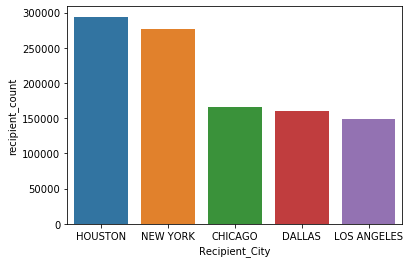

In [78]:
ax = sns.barplot(x="Recipient_City",y="recipient_count",data=pandas_df.head(5))

In [79]:
x = full_vaex_df["Total_Amount_of_Payment_USDollars"].to_pandas_series()

In [80]:
removed_outliers = x.between(x.quantile(.05), x.quantile(.95))

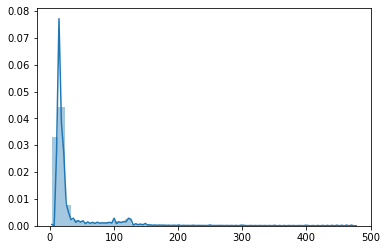

In [82]:
ax = sns.distplot(x[removed_outliers])

In [2]:
dask_df = dd.read_parquet("temp_medicare_*.parquet",engine='fastparquet')

Index(['Change_Type', 'Covered_Recipient_Type', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name',
       'Physician_Profile_ID', 'Physician_First_Name', 'Physician_Middle_Name',
       'Physician_Last_Name', 'Physician_Name_Suffix',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code', 'Physician_Primary_Type',
       'Physician_Specialty', 'Physician_License_State_code1',
       'Physician_License_State_code2', 'Physician_License_State_code3',
       'Physician_License_State_code4', 'Physician_License_State_code5',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_o

In [23]:
%%time
df_1 = dask_df['Total_Amount_of_Payment_USDollars'].astype(float)
df_1.describe().compute()

CPU times: user 2min 23s, sys: 26.7 s, total: 2min 50s
Wall time: 2min 37s


count    1.036731e+07
mean     3.437341e+02
std      1.140449e+05
min      1.000000e-02
25%      1.433000e+01
50%      1.971000e+01
75%      1.235000e+02
max      3.000000e+08
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [33]:
%%time
vdf = vaex_df[['Total_Amount_of_Payment_USDollars','Recipient_City','Covered_Recipient_Type']]

CPU times: user 208 µs, sys: 0 ns, total: 208 µs
Wall time: 214 µs


In [35]:
vdf.describe()

,Total_Amount_of_Payment_USDollars,Recipient_City,Covered_Recipient_Type
dtype,float64,str,str
count,10367307,10367307,10367307
NA,0,0,0
mean,343.73409288843277,--,--
std,114045,--,--
min,0.01,--,--
max,3e+08,--,--
